In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [ ]:

stock_data = pd.read_csv(r'C:\Users\rajes\OneDrive\Documents\archive[1]\AMZN.csv')

         Date     Open     High        Low    Close  Adj Close     Volume
0  2015-01-26  15.5910  15.6500  15.376000  15.4830    15.4830   63394000
1  2015-01-27  15.3150  15.5120  15.131500  15.3375    15.3375   58406000
2  2015-01-28  15.4905  15.5755  15.190000  15.1955    15.1955   61276000
3  2015-01-29  15.2365  15.6400  14.966500  15.5890    15.5890  173132000
4  2015-01-30  17.3160  17.9750  17.037001  17.7265    17.7265  477122000


In [ ]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2261,2024-01-19,153.830002,155.759995,152.740005,155.339996,155.339996,51033700
2262,2024-01-22,156.889999,157.050003,153.899994,154.779999,154.779999,43687500
2263,2024-01-23,154.850006,156.210007,153.929993,156.020004,156.020004,37986000
2264,2024-01-24,157.800003,158.509995,156.479996,156.869995,156.869995,48547300
2265,2024-01-25,156.949997,158.509995,154.550003,157.750000,157.750000,43527900


In [10]:
stock_data.shape

(2266, 7)

In [7]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-26,15.5910,15.6500,15.376000,15.4830,15.4830,63394000
1,2015-01-27,15.3150,15.5120,15.131500,15.3375,15.3375,58406000
2,2015-01-28,15.4905,15.5755,15.190000,15.1955,15.1955,61276000
3,2015-01-29,15.2365,15.6400,14.966500,15.5890,15.5890,173132000
4,2015-01-30,17.3160,17.9750,17.037001,17.7265,17.7265,477122000


In [8]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2.266000e+03
mean,92.941753,94.019235,91.767671,92.914363,92.914363,7.978251e+07
std,48.542560,49.145375,47.887035,48.502387,48.502387,4.062500e+07
min,15.236500,15.512000,14.966500,15.195500,15.195500,1.762600e+07
25%,45.578250,45.917876,45.305248,45.464126,45.464126,5.366350e+07
50%,91.146748,92.050003,90.237499,91.031250,91.031250,6.832200e+07
75%,134.680000,136.609997,133.494996,134.939999,134.939999,9.309050e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2266 non-null   object 
 1   Open       2266 non-null   float64
 2   High       2266 non-null   float64
 3   Low        2266 non-null   float64
 4   Close      2266 non-null   float64
 5   Adj Close  2266 non-null   float64
 6   Volume     2266 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.1+ KB


In [14]:
stock_data.nunique()

Date         2266
Open         2177
High         2211
Low          2218
Close        2228
Adj Close    2228
Volume       2236
dtype: int64

In [15]:
stock_data.iloc[::2]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-26,15.591000,15.650000,15.376000,15.483000,15.483000,63394000
2,2015-01-28,15.490500,15.575500,15.190000,15.195500,15.195500,61276000
4,2015-01-30,17.316000,17.975000,17.037001,17.726500,17.726500,477122000
6,2015-02-03,18.014500,18.391001,18.010500,18.177500,18.177500,124252000
8,2015-02-05,18.299999,18.940001,18.295000,18.694500,18.694500,144952000
...,...,...,...,...,...,...,...
2256,2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700
2258,2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600
2260,2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200
2262,2024-01-22,156.889999,157.050003,153.899994,154.779999,154.779999,43687500


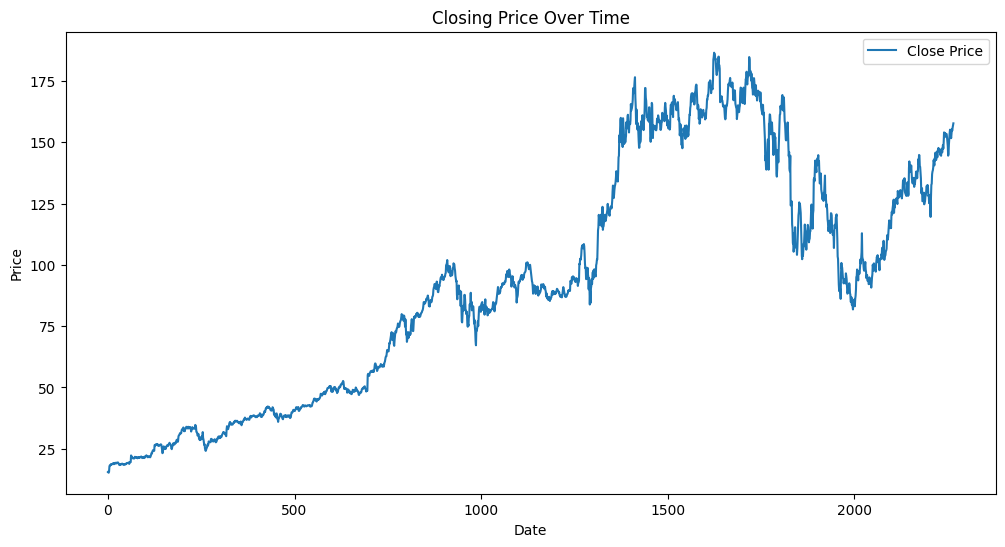

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

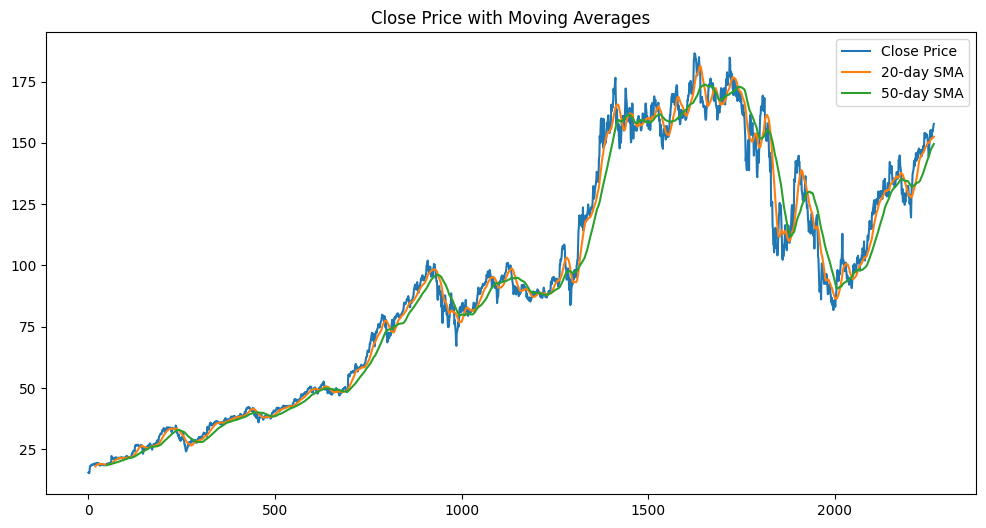

In [ ]:

stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA_20'], label='20-day SMA')
plt.plot(stock_data['SMA_50'], label='50-day SMA')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.show()

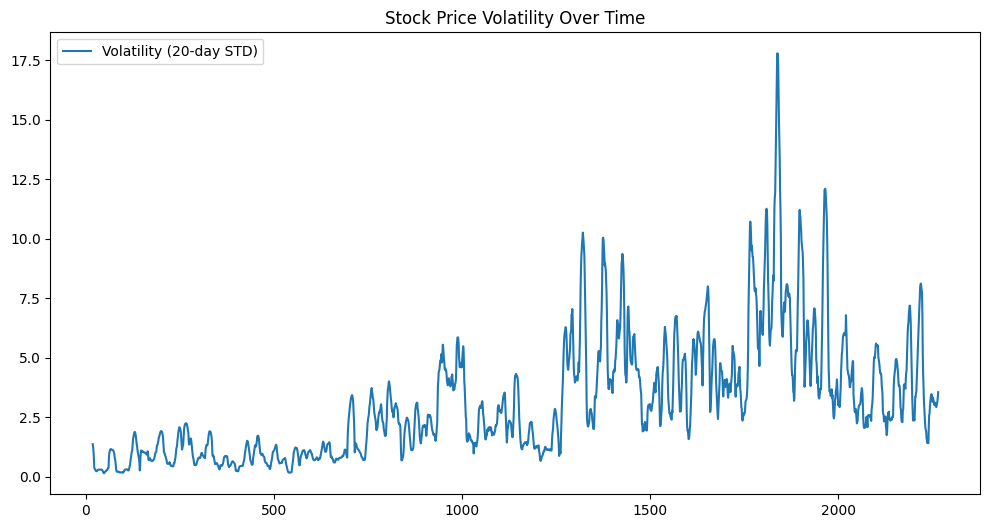

In [ ]:
stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()
plt.figure(figsize=(12,6))
plt.plot(stock_data['Volatility'], label='Volatility (20-day STD)')
plt.title('Stock Price Volatility Over Time')
plt.legend()
plt.show()

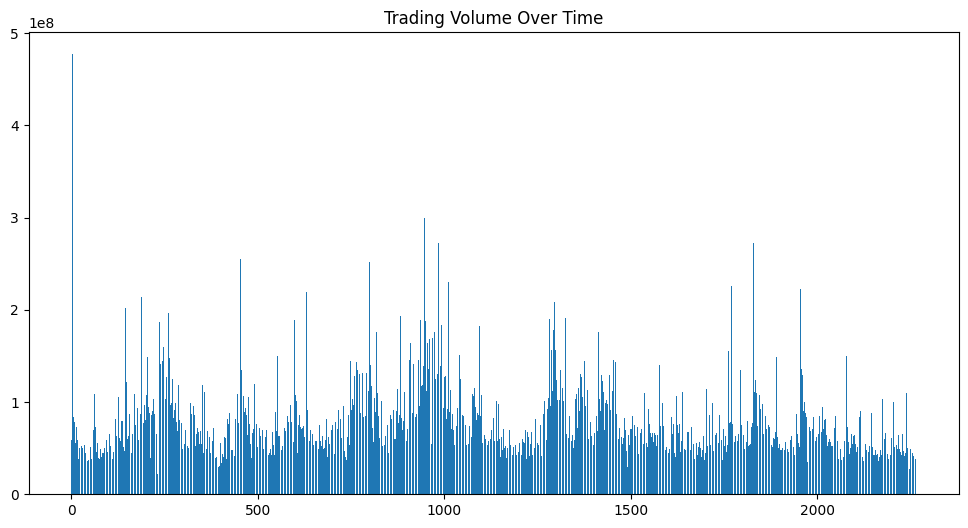

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(stock_data.index, stock_data['Volume'], label='Volume Traded')
plt.title('Trading Volume Over Time')
plt.show()

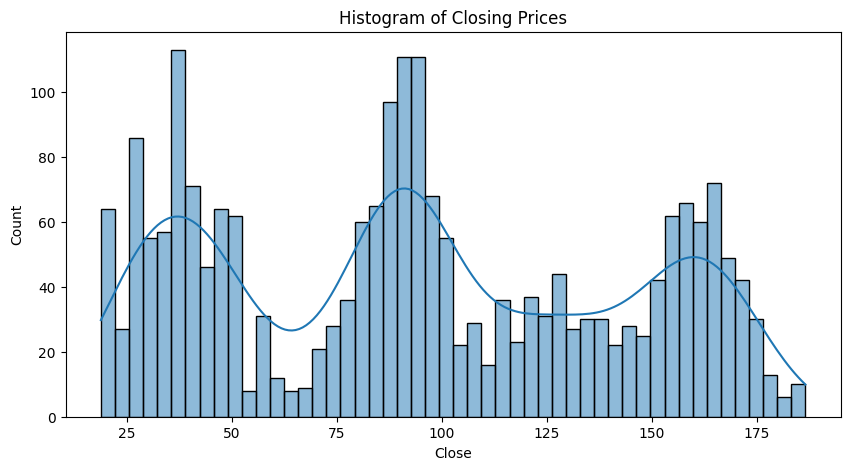

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(stock_data["Close"], bins=50, kde=True)
plt.title("Histogram of Closing Prices")
plt.show()

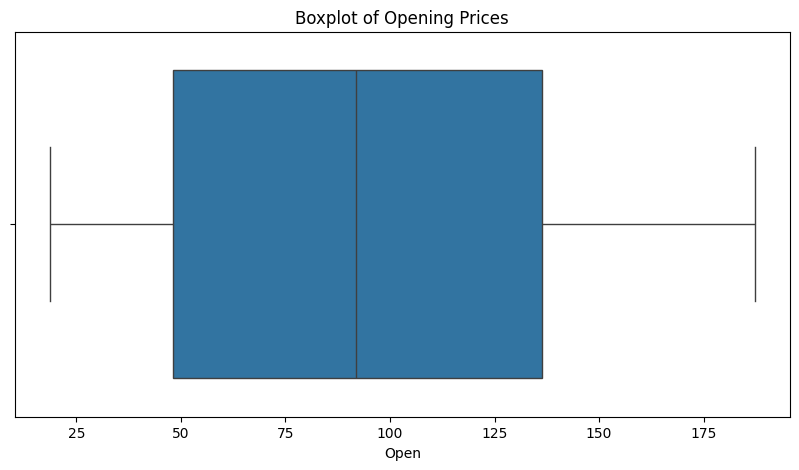

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=stock_data["Open"])
plt.title("Boxplot of Opening Prices")
plt.show()

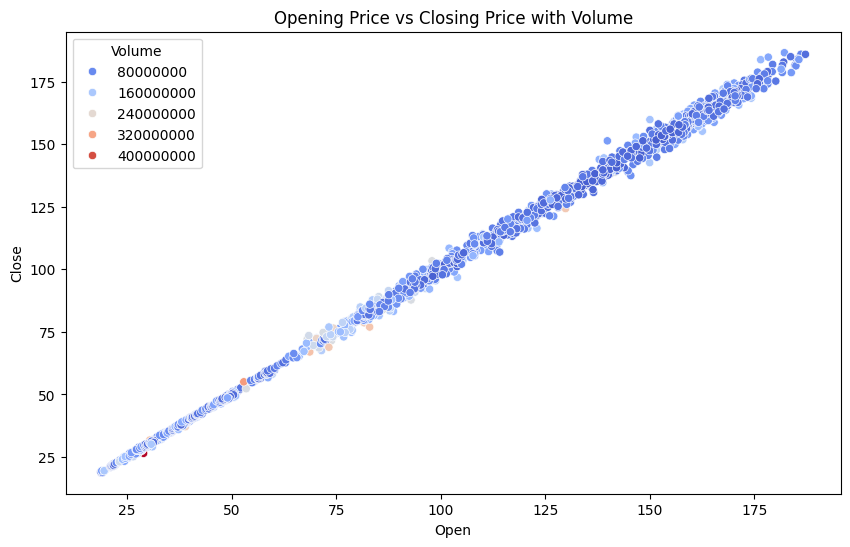

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=stock_data["Open"], y=stock_data["Close"], hue=stock_data["Volume"], palette="coolwarm")
plt.title("Opening Price vs Closing Price with Volume")
plt.show()

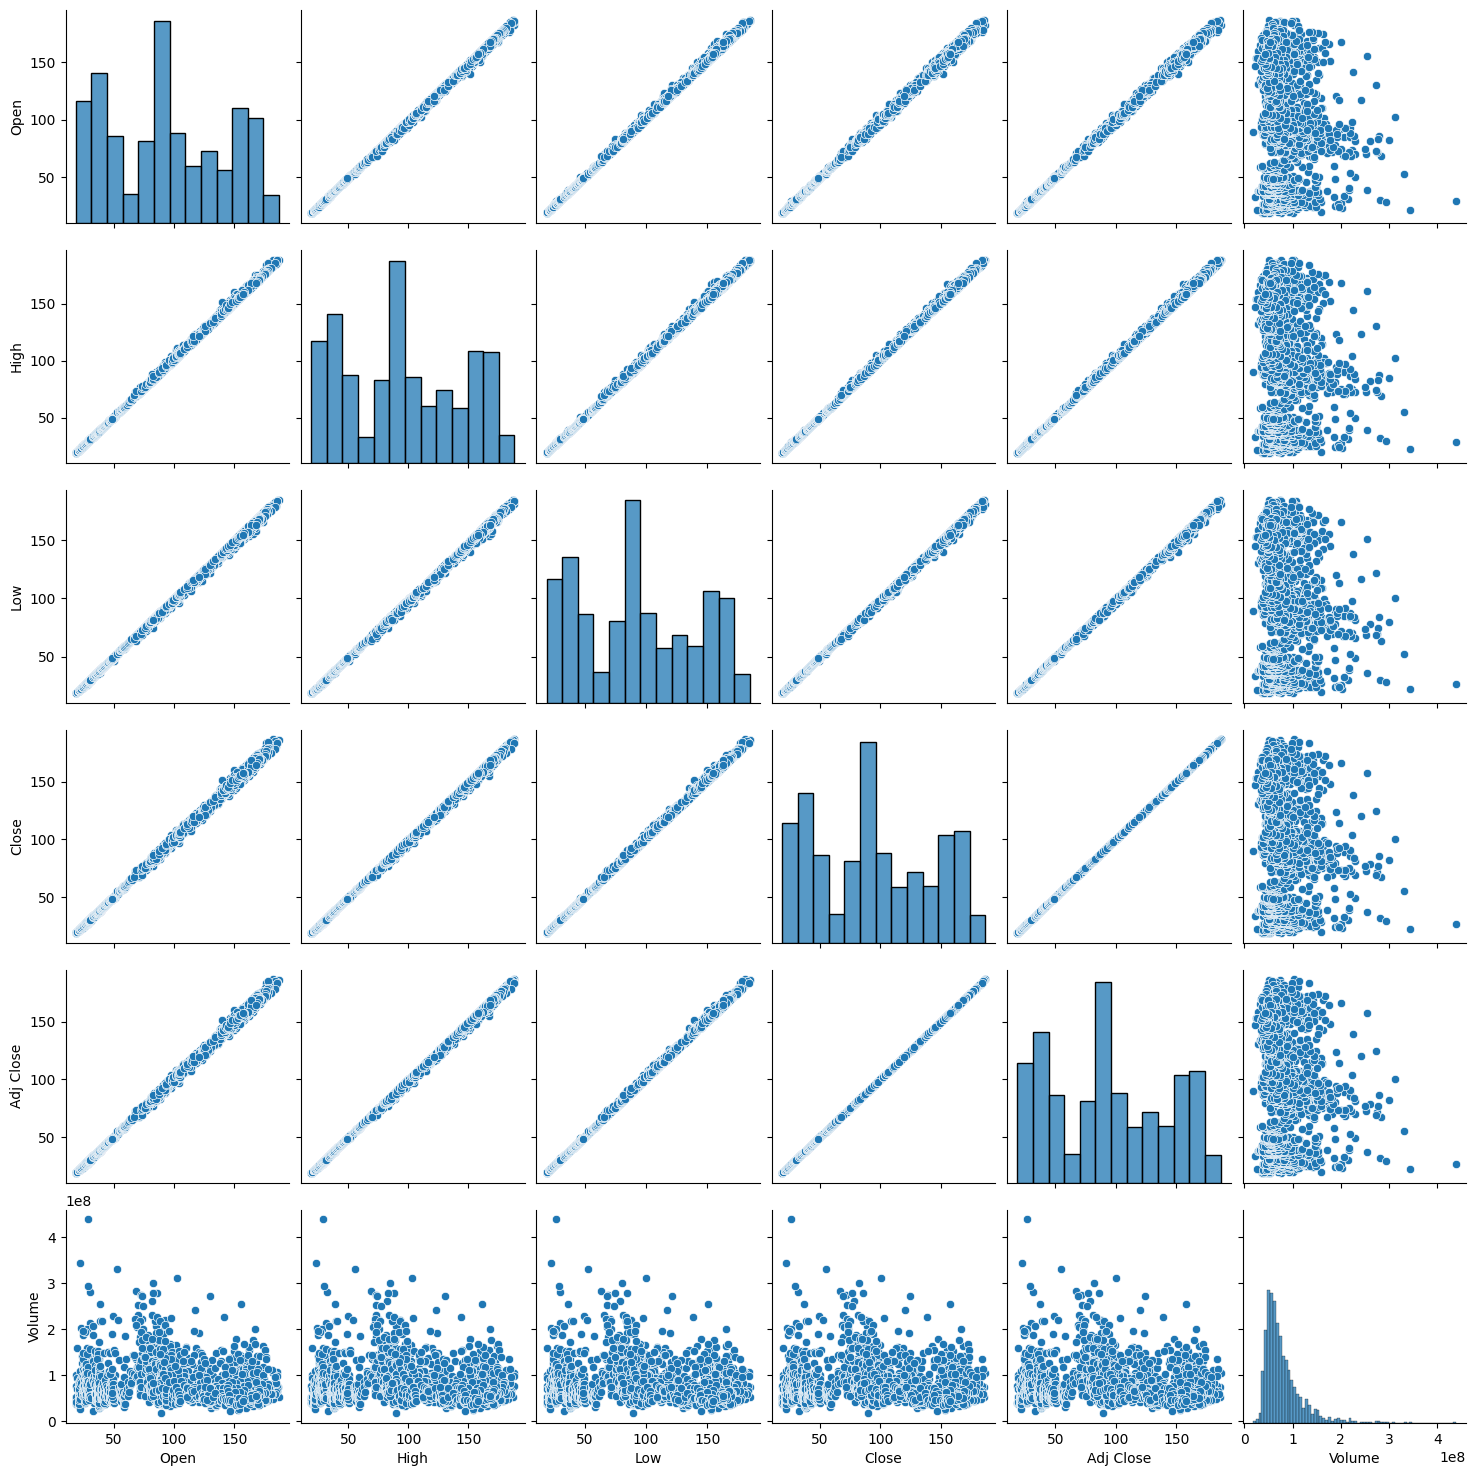

In [ ]:
sns.pairplot(stock_data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]])
plt.show()

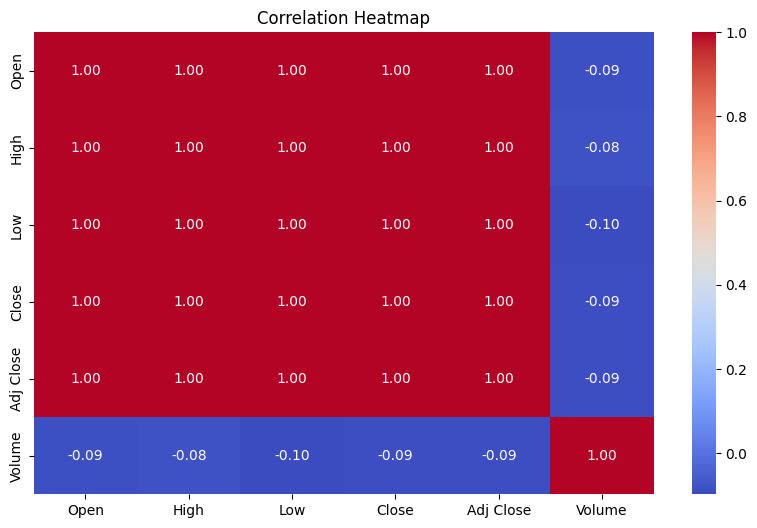

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.heatmap(stock_data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

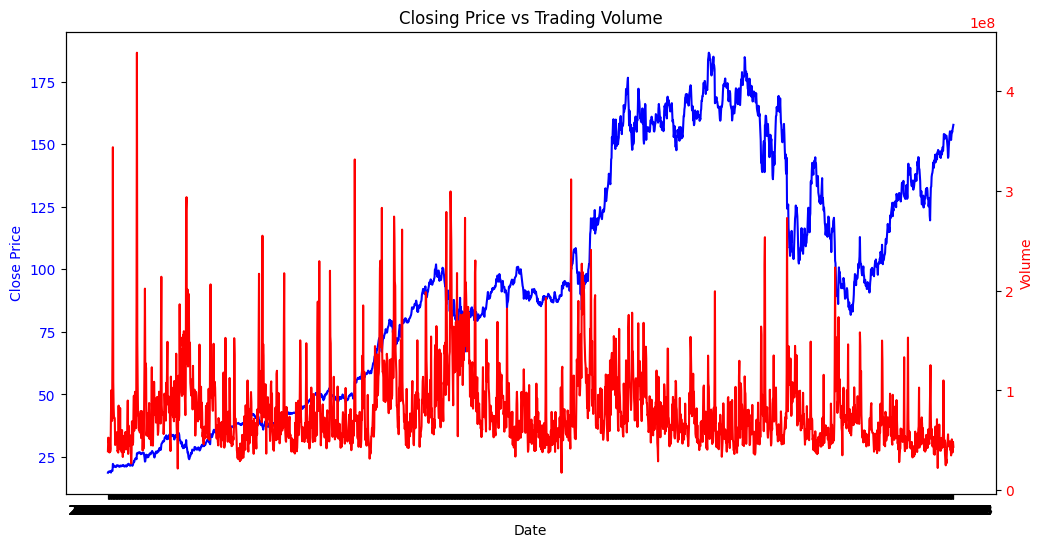

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.plot(stock_data["Date"], stock_data["Close"], label="Close Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Volume", color="red")
ax2.plot(stock_data["Date"], stock_data["Volume"], label="Volume", color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.xticks(rotation=45)
plt.title("Closing Price vs Trading Volume")
plt.show()

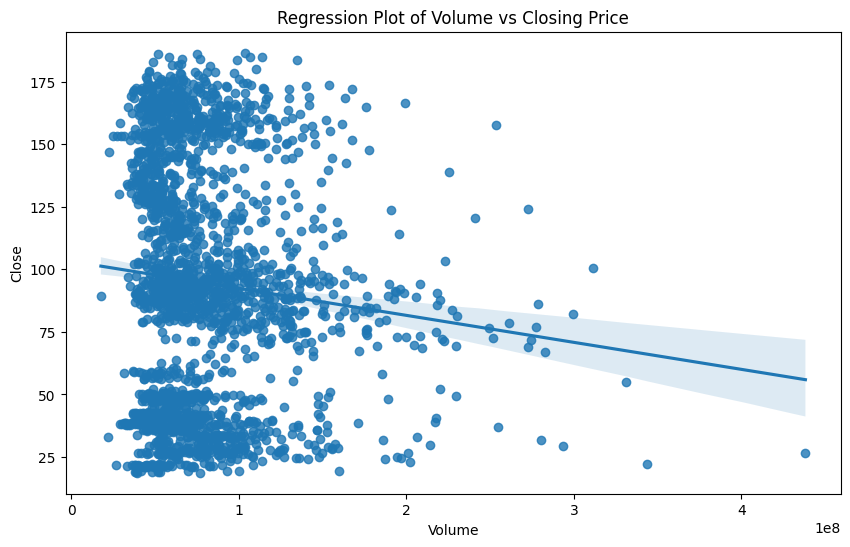

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=stock_data["Volume"], y=stock_data["Close"])
plt.title("Regression Plot of Volume vs Closing Price")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
stock_data = stock_data.dropna()

stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,MA_10,MA_30
78,2015-05-18,21.299999,21.363501,21.073000,21.261999,21.261999,47804000,21.140300,19.73566,0.764367,21.375600,20.466583
79,2015-05-19,21.243500,21.412001,21.031500,21.085501,21.085501,49284000,21.216625,19.77881,0.668339,21.378200,20.545417
80,2015-05-20,21.030001,21.355000,20.917999,21.193001,21.193001,43924000,21.301775,19.83316,0.531194,21.402000,20.616517
81,2015-05-21,21.400000,21.844999,21.400000,21.581499,21.581499,82428000,21.405875,19.89842,0.322368,21.425750,20.696667
82,2015-05-22,21.577499,21.622000,21.380501,21.381500,21.381500,40412000,21.362200,19.95181,0.252975,21.395450,20.771633
...,...,...,...,...,...,...,...,...,...,...,...,...
2261,2024-01-19,153.830002,155.759995,152.740005,155.339996,155.339996,51033700,151.868500,148.43200,3.008953,152.295000,150.788333
2262,2024-01-22,156.889999,157.050003,153.899994,154.779999,154.779999,43687500,152.001500,148.67340,3.078636,153.248999,151.130333
2263,2024-01-23,154.850006,156.210007,153.929993,156.020004,156.020004,37986000,152.110500,148.95220,3.183945,153.940999,151.434999
2264,2024-01-24,157.800003,158.509995,156.479996,156.869995,156.869995,48547300,152.283000,149.27760,3.347863,154.490999,151.749999


In [ ]:
data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

data

,Open,High,Low,Close,Volume
49,18.807501,18.965500,18.701500,18.720501,39098000
50,18.733000,19.079000,18.732500,19.059999,52728000
51,19.033001,19.221001,18.940001,19.177000,47846000
52,19.215500,19.356001,19.066000,19.132500,51470000
53,19.176500,19.264000,19.007000,19.118000,37890000
...,...,...,...,...,...
2261,153.830002,155.759995,152.740005,155.339996,51033700
2262,156.889999,157.050003,153.899994,154.779999,43687500
2263,154.850006,156.210007,153.929993,156.020004,37986000
2264,157.800003,158.509995,156.479996,156.869995,48547300


In [ ]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()  
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['Volatility'] = data['Close'].rolling(window=20).std()  

C:\Users\rajes\AppData\Local\Temp\ipykernel_15888\2983437112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_20'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
C:\Users\rajes\AppData\Local\Temp\ipykernel_15888\2983437112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
C:\Users\rajes\AppData\Local\Temp\ipykernel_15888\2983437112.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
data = data.dropna()
data

,Open,High,Low,Close,Volume,SMA_20,SMA_50,Volatility
98,21.207500,21.398500,21.133499,21.363001,45928000,21.418300,20.84727,0.188845
99,21.417999,21.567499,21.237499,21.390499,43718000,21.433550,20.90067,0.172131
100,21.514999,21.986500,21.470501,21.969500,67568000,21.472375,20.95886,0.200287
101,22.013000,22.249500,21.662001,21.746000,89902000,21.480600,21.01024,0.208225
102,21.850000,21.962000,21.709000,21.814501,36472000,21.502250,21.06388,0.219580
...,...,...,...,...,...,...,...,...
2261,153.830002,155.759995,152.740005,155.339996,51033700,151.868500,148.43200,3.008953
2262,156.889999,157.050003,153.899994,154.779999,43687500,152.001500,148.67340,3.078636
2263,154.850006,156.210007,153.929993,156.020004,37986000,152.110500,148.95220,3.183945
2264,157.800003,158.509995,156.479996,156.869995,48547300,152.283000,149.27760,3.347863


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
import numpy as np

def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 3])  
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

print('X shape:', X.shape)  
print('y shape:', y.shape) 

X shape: (2108, 60, 8)
y shape: (2108,)


In [ ]:
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

final_features=stock_data[['Volume','Open','High','Low','Close']].dropna()
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(final_features)

def create_sequences(data, target_idx, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, target_idx])
    return np.array(X), np.array(y)

target_col_index = final_features.columns.get_loc('Close')
X, y = create_sequences(scaled_features, target_col_index)

X_flat = X.reshape(X.shape[0], -1)

split = int(0.8 * len(X))
X_train_lstm, X_test_lstm = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_train_ml, X_test_ml = X_flat[:split], X_flat[split:]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

y_pred_lstm = model_lstm.predict(X_test_lstm)

c:\Users\rajes\OneDrive\Desktop\thulasi\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0365 - val_loss: 0.0015
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

close_prices = final_features['Close']
train_size = int(len(close_prices)*0.8)
train_close = close_prices[:train_size]
test_close = close_prices[train_size:]

model_arima = ARIMA(train_close, order=(5,1,0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=len(test_close))

c:\Users\rajes\OneDrive\Desktop\thulasi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\rajes\OneDrive\Desktop\thulasi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\rajes\OneDrive\Desktop\thulasi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\rajes\OneDrive\Desktop\thulasi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueW

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_ml, y_train)
y_pred_rf = rf.predict(X_test_ml)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_ml, y_train)
y_pred_knn = knn.predict(X_test_ml)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_metrics(true, pred, model_name):
    rmse = np.sqrt(mean_absolute_error(true,pred))
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    print(f"{model_name} => RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

print_metrics(y_test, y_pred_lstm, "LSTM")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_knn, "KNN")
print_metrics(test_close, forecast_arima, "ARIMA")

LSTM => RMSE: 0.1755, MAE: 0.0308, R2: 0.8881
Random Forest => RMSE: 0.1418, MAE: 0.0201, R2: 0.9439
KNN => RMSE: 0.3123, MAE: 0.0975, R2: -0.1957
ARIMA => RMSE: 6.1856, MAE: 38.2621, R2: -3.9716


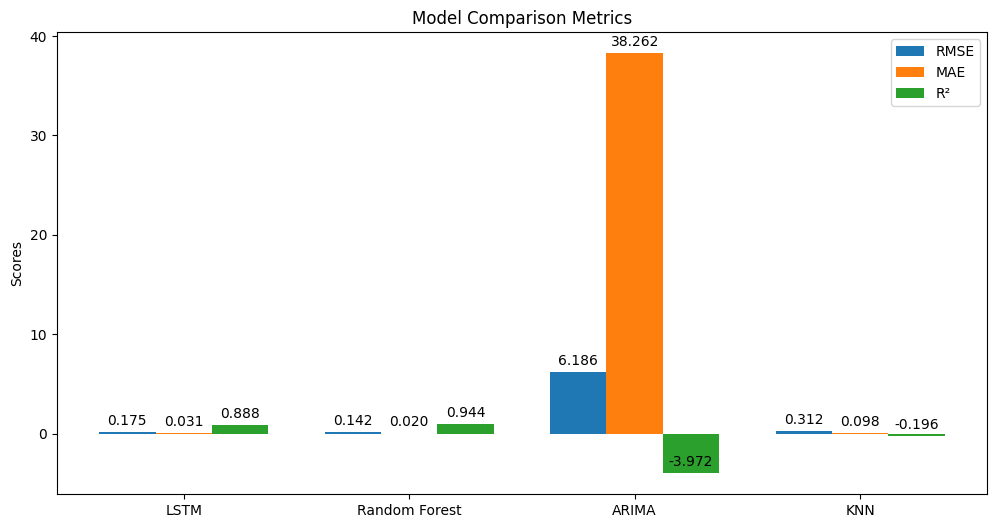

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def get_metrics(true, pred):
    rmse = np.sqrt(mean_absolute_error(true,pred))
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return rmse,mae,r2

rmse_lstm,mae_lstm,r2_lstm=get_metrics(y_test,y_pred_lstm)
rmse_rf,mae_rf,r2_rf=get_metrics(y_test,y_pred_rf)
rmse_arima,mae_arima,r2_arima=get_metrics(test_close,forecast_arima)
rmse_knn,mae_knn,r2_knn=get_metrics(y_test,y_pred_knn)

models = ['LSTM', 'Random Forest', 'ARIMA', 'KNN']

rmse = [rmse_lstm, rmse_rf, rmse_arima, rmse_knn]
mae = [mae_lstm, mae_rf, mae_arima, mae_knn]
r2 = [r2_lstm, r2_rf, r2_arima, r2_knn]

x = np.arange(len(models))  
width = 0.25  

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, rmse, width, label='RMSE')
rects2 = ax.bar(x, mae, width, label='MAE')
rects3 = ax.bar(x + width, r2, width, label='R²')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()